In [8]:
import pandas as pd

# Veri seti 
sorular = [
    # İş Hukuku (0)
    "İşten sebepsiz yere çıkarıldım, tazminat hakkım var mı?",
    "Fazla mesai ücretimi nasıl talep edebilirim?",
    "Sözleşmesiz çalıştığım iş yerinden alacak davası açabilir miyim?",
    "İş kazasında tazminat talebinde bulunabilir miyim?",
    "Haklı fesih durumunda işten ayrılırsam tazminat alabilir miyim?",

    # Aile Hukuku (1)
    "Boşanma davası açmak için hangi belgeler gerekiyor?",
    "Çocuk velayeti hangi durumlarda babaya verilir?",
    "Nafaka miktarı nasıl belirlenir?",
    "Boşanırken mal paylaşımı nasıl olur?",
    "Evlilik sözleşmesi yapabilir miyim?",

    # Ticaret Hukuku (2)
    "Şirket ortaklığı sözleşmesi nasıl hazırlanır?",
    "Alacaklı şirketime icra takibi başlattı, ne yapmalıyım?",
    "İflas eden şirkette alacak nasıl tahsil edilir?",
    "Fatura ödemem gecikti, hukuki sorumluluğum nedir?",
    "Limited şirket ortakları hangi haklara sahiptir?",

    # Ceza Hukuku (3)
    "Birine hakaret ettiğim iddia ediliyor, ceza alır mıyım?",
    "Adli kontrol şartı nedir?",
    "Şikayet geri çekilirse dava düşer mi?",
    "Savcılık ifadesinde avukatım olmadan bulunabilir miyim?",
    "Trafik kazasında yaralama olursa ceza davası açılır mı?",

    # Miras Hukuku (4)
    "Miras paylaşımında itiraz nasıl yapılır?",
    "Vasiyetname iptali için dava açılabilir mi?",
    "Mirasçılar arası anlaşmazlık nasıl çözülür?",
    "Tapu devri yapılmadan miras paylaşılır mı?",
    "Saklı paylı miras hakkı nedir?"
]

# Etiketler
etiketler = (
    [0]*5 +  # İş Hukuku
    [1]*5 +  # Aile Hukuku
    [2]*5 +  # Ticaret Hukuku
    [3]*5 +  # Ceza Hukuku
    [4]*5    # Miras Hukuku
)

# DataFrame olurturma;
df = pd.DataFrame({
    "soru": sorular,
    "label": etiketler
})

print(df.head())


                                                soru  label
0  İşten sebepsiz yere çıkarıldım, tazminat hakkı...      0
1       Fazla mesai ücretimi nasıl talep edebilirim?      0
2  Sözleşmesiz çalıştığım iş yerinden alacak dava...      0
3  İş kazasında tazminat talebinde bulunabilir mi...      0
4  Haklı fesih durumunda işten ayrılırsam tazmina...      0


Modelin doğruluk oranı: %40.00


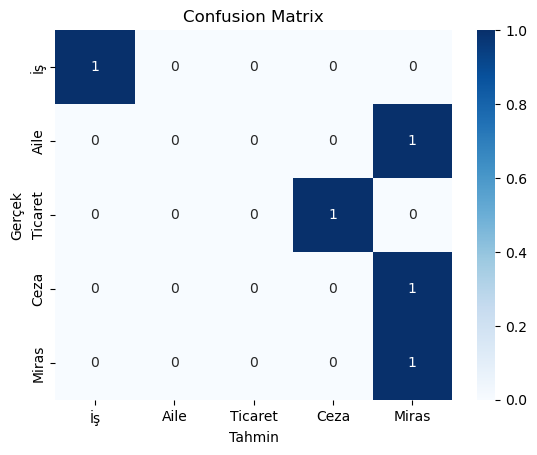

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. TF-IDF Vektörleştirme ---
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(df["soru"])
y = df["label"]

# --- 2. Eğitim ve Test Setlerine Ayırma ---
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# --- 3. Model Kurulumu ve Eğitimi ---
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train, y_train)

# --- 4. Test Verisi Üzerinde Tahmin ---
y_pred = model.predict(X_test)

# --- 5. Başarı Oranı ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk oranı: %{accuracy * 100:.2f}")

# --- 6. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["İş", "Aile", "Ticaret", "Ceza", "Miras"], yticklabels=["İş", "Aile", "Ticaret", "Ceza", "Miras"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


In [10]:
def predict_soru(soru):
    soru_vect = vectorizer.transform([soru])
    tahmin = model.predict(soru_vect)[0]
    
    kategori_etiketleri = {
        0: "İş Hukuku",
        1: "Aile Hukuku",
        2: "Ticaret Hukuku",
        3: "Ceza Hukuku",
        4: "Miras Hukuku"
    }
    
    return kategori_etiketleri[tahmin]


In [11]:
# Örnek kullanım:
print(predict_soru("Boşanma davası açmak istiyorum, nasıl bir yol izlemeliyim?"))
print(predict_soru("İş kazasında tazminat alabilir miyim?"))
print(predict_soru("Şirket sözleşmemi nasıl değiştirebilirim?"))

Aile Hukuku
İş Hukuku
Ticaret Hukuku
